# Lesson I 

## DataFrames and Series

The goal of exploratory data analysis is to use data to answer questions and guide decision making.

## Using data to answer questions

What is the average birth weight of babies in the United States?

* Find appropriate data, or collect it
* Read data in your development environment
* Clean and validate data

### National Survey of Family Growth (NSFG)

For this question we'll use data from the National Survey of Family Growth, which is available from the National Center for Health Statistics. The 2013-2015 dataset includes information about a representative sample of women in the U.S. and their children.

> [NSFG](https://www.cdc.gov/nchs/nsfg/index.htm) data, from the National Center for Health statistics, nationally representative of women 15-44 years of age in the ... United states. has "Information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and general and reproductive health."


## Reading Data

``head()`` shows the first 5 rows of the DataFrame, which contains one row for each pregnancy for each of the women who participated in the survey, and one column for each variable.

### Columns and rows

The DataFrame has an *attribute* called ``.shape``, which is the number of rows and columns; there are *9358* rows in this dataset, one for each pregnancy, and *10* columns, one for each variable. 

The DataFrame also has an attribute called ```columns```, which is an Index. That's another Pandas data structure, similar to a list; in this case it's a list of variables names, which are strings.

<img src='pictures/birthweight.jpg' />

This figure shows an entry from the codebook for ``birthwgt_lb1``, which is the weight in pounds of the first baby from this pregnancy, for cases of live birth.

#### Each Column is a Series

In many ways a DataFrame is like a Python dictionary, where the variable names are the keys and the columns are the values. You can select a column from a DataFrame using the bracket``[]`` operator, with a *string* as the key. The result is a ``Series``, which is another Pandas data structure.

``.head()`` shows the first five values in the *series*, the **name** of the series, and the **datatype**; ``float64`` means that these values are 64-bit floating-point numbers.

``NaN``, which stands for *"Not a Number"*. ``NaN`` is a special value that can indicate invalid or missing data. 

## Exercise

### Exploring the NSFG data

To get the number of rows and columns in a DataFrame, you can read its ``shape`` attribute.

To get the column names, you can read the ``columns`` attribute. 
The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data!

In [10]:
# Import pandas
import pandas as pd
# NSFG data
filename = 'datasets/nsfg.hdf5'
nsfg = pd.read_hdf(filename)

In [11]:
# Display the number of rows and columns
nsfg.shape 

(9358, 10)

In [12]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [16]:
# Select Column birthwgt_oz1 : ounces
ounces = nsfg['birthwgt_oz1']
# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


# Lesson II

## Clean and Validate

In the previous lesson, we read data from the National Survey of Family Growth and selected a column from a DataFrame. In this lesson, we'll check for errors and prepare the data for analysis.

We'll use the same DataFrame we used in the previous lesson, ``nsfg``, which contains one row for each pregnancy in the survey. 

I'll select the variable ``birthwgt_lb1``, which contains the pound part of birth weight, and assign it to ``pounds``. And ``birthwgt_oz1`` contains the ounce part of birth weight, so I'll assign that to ``ounces``.

In [17]:
# Pounds
pounds = nsfg['birthwgt_lb1']

# Ounces
ounces = nsfg['birthwgt_oz1']

Before we do anything with this data, we have to **validate** it. One part of validation is confirming that we are interpreting the data correctly. We can use ``value_counts()`` to see what values appear in pounds and how many times each value appears. 

By default, the results are sorted with the most frequent value first, so I use ``sort_index()`` to sort them by value instead, with the lightest babies first and heaviest babies last.

In [19]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two values, 98, and 99, that indicate missing data.

<img src='pictures/birthweight.jpg' />

We can validate the results by comparing them to the codebook, which lists the values and their frequencies. The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.

### Describe

Another way to validate the data is with ``describe()``, which computes summary statistics like the *mean, standard deviation, min, and max*. Here are the results for pounds:

In [20]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

*count* is the number of values. 

The *minimum* and *maximum* values are 0 and 99, and the 50th percentile, which is the *median*, is 7. 

The *mean* is about 8.05, but that doesn't mean much because it includes the special values 98 and 99. 

Before we can really compute the mean, we have to replace those values with NaN to represent missing data.

### Replace

The ``replace()`` method does what we want; it takes a list of values we want to replace and the value we want to replace them with. 

``np.nan`` means we are getting the special value ``NaN`` from the ``NumPy`` library, which is imported as np. 

The result from ``replace()`` is a *new* Series, which I assign back to pounds. Remember that the mean of the original series was about 8 point 05 pounds:

In [21]:
# import numpy
import numpy as np

pounds = pounds.replace([98, 99], np.nan)
display(pounds.mean())

6.703286384976526

The *mean* of the new series is about 6 point 7 pounds. It makes a big difference when you remove a few 99-pound babies! 

Instead of making a new Series, you can call ``replace()`` with ``inplace=True``, which modifies the existing Series "in place", that is, without making a copy. 

Here's what that looks like for ounces. Since we didn't make a new series, we don't have to assign it back to ounces.

In [22]:
ounces.replace([98, 99], np.nan, inplace=True)

## Arithemetic with Series

Now we want to combine pounds and ounces into a single Series that contains total birth weight. Arithmetic operators work with Series objects; so, to convert from ounces to pounds, we can divide by 16 (there are 16 ounces in a pound). Then we can add the two Series objects to get the total. Here are the results:

In [23]:
birth_weight = pounds + ounces / 16
display(birth_weight.describe())

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

The mean is about 7 point 1, which is a little more than what we got before we added in the ounces part. 

Now we're close to answering our original question, the average birth weight for babies in the U.S., but as we'll see in the next lesson, we're not there yet.

## Exercise

### Clean a variable

In the NSFG dataset, the variable ``'nbrnaliv'`` records the number of babies born alive at the end of a pregnancy.

If you use ``.value_counts()`` to view the responses, you'll see that the value *8* appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with ``np.nan``. 

In [26]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### Compute a variable

For each pregnancy in the NSFG dataset, the variable ``'agecon'`` encodes the respondent's age at conception, and ``'agepreg'`` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value *2575* means that the respondent's age was *25.75*.

In [30]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


# Lesson III

## Filter and Visualize

Let's get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.?

## Histogram

In the previous lesson, we used data from the *NSFG* to compute birth weight in pounds and we stored the result in a Series called ``birth_weight``. 

Let's see what the distribution of those values looks like. We'll use the *pyplot* submodule from the *matplotlib* visualization library, which we import as *plt*. 

Pyplot provides ``hist()``, which takes a Series and plots a histogram; that is, it shows the values and how often they appear. However, pyplot doesn't work with ``NaN``s, so we have to use ``dropna()``, which makes a new Series that contains only the valid values. 

The second argument, ``bins``, tells hist to divide the range of weights into 30 intervals, called *"bins"*, and count how many values fall in each bin. ``hist()`` takes other arguments that specify the type and appearance of the histogram; you will have a chance to explore these options in the next exercise. 

To label the axes we'll use ``xlabel()`` and ``ylabel()``, and finally, to display the plot, we'll use ``plt.show()``.

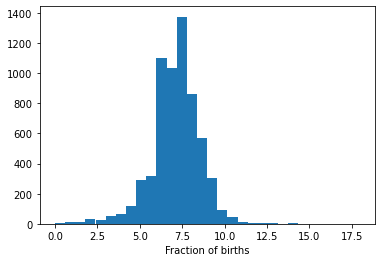

In [31]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(birth_weight.dropna(), bins=30)

# Add labels
plt.xlabel('Birth weight (lb)')
plt.xlabel('Fraction of births')

# Show the plot
plt.show()

And here's what the results look like. The x-axis is birth weight in pounds, divided into 30 bins. The y-axis is the number of births in each bin. 

The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies. 

That makes sense because the distribution includes some babies that were born preterm. The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

## Boolean Series

To see which babies are preterm, we can use the ``prglngth`` column, which records pregnancy length in weeks. 

When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False. 

In this case, it's True for each preterm baby and False otherwise. 

We can use head() to see the first 5 elements.

In [32]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

If you compute the sum of a Boolean Series, it treats True as 1 and False as 0, so the sum is the number of Trues, which is the number of preterm babies, about 3700.

In [33]:
preterm.sum()

3742

If you compute the mean, you get the fraction of Trues; in this case, it's close to 0.4; that is, about 40% of the births in this dataset are preterm.

In [34]:
preterm.mean()

0.39987176747168196

## Filtering

We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion. 

For example, we can use preterm and the bracket operator to select values from birth_weight, so preterm_weight contains birth weights for preterm babies. 

To select full-term babies, we can use the tilde operator, which is "logical NOT" or inverse; it makes the Trues false and the Falses true. 

In [35]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [36]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

Other Logical Operators:

* ``&`` (logical AND)
* ``|`` (logical OR)

Example:

```python
    birth_weight[A & B] # Both true
    birth_weight[A | B] # Either or both true
```

## Resampling

There's one more thing we have to do before we can answer our question: resampling. The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are **"oversampled"**.

Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by resampling. I won't get into the details here, but I have provided a function called ``resample_rows_weighted()`` that you can use for the exercises. 

## Exercise

### Make a histogram

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable ``'agecon'`` that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the ``bins`` parameter that you saw in the video, and also a new parameter - ``histtype`` -  which you can read more about [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

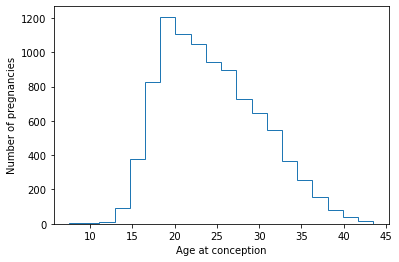

In [39]:
# Plot the histogram
plt.hist(agecon, bins=20,
         histtype='step',)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the plot
plt.show()